In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/Dataset/Photos.rar", outdir="/content")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 10.6 MB/s eta 0:00:00
patool: Extracting /content/drive/MyDrive/Dataset/Photos.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/Dataset/Photos.rar
patool:     with cwd='/content'
patool: ... /content/drive/MyDrive/Dataset/Photos.rar extracted to `/content'.


'/content'

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import shutil

In [ ]:
print("Number of female photos:",len('/content/Photos/Female'))
print("Number of male photos:",len('/content/Photos/Male'))

Number of female photos: 22
Number of male photos: 20


In [ ]:
os.mkdir('train')
os.mkdir('valid')

In [ ]:
os.mkdir('train/male')
os.mkdir('valid/female')
os.mkdir('train/female')
os.mkdir('valid/male')

In [ ]:
dir_1 = '/content/Photos/Male'
dir_2 = '/content/train/male'

dir1_lst = os.listdir(dir_1)
dir1_lst.sort()

for img in dir1_lst[:15]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_2, img))

dir_3 = '/content/valid/male'

for img in dir1_lst[15:]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_3, img))

In [ ]:
dir_1 = '/content/Photos/Female'
dir_2 = '/content/train/female'

dir1_lst = os.listdir(dir_1)
dir1_lst.sort()

for img in dir1_lst[:15]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_2, img))

dir_3 = '/content/valid/female'

for img in dir1_lst[15:]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_3, img))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1/255)
validation_data_gen = ImageDataGenerator(rescale=1/255)

train_gen = train_data_gen.flow_from_directory(
    '/content/train',
    target_size = (256,256),
    class_mode = 'binary'
)

val_gen = train_data_gen.flow_from_directory(
    '/content/valid',
    target_size = (256,256),
    class_mode = 'binary'
)

Found 30 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(layers.Conv2D(input_shape=(256, 256, 3), filters=128,kernel_size=(7,7), padding="same",activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (7, 7), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     18944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 128)     409728    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        401472    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_fit = model.fit(train_gen,
                     epochs = 20,
                    verbose = 1,
                     validation_data = val_gen)

Epoch 1/20
1/1 [==============================] - 15s 15s/step - loss: 0.6931 - accuracy: 0.4667 - val_loss: 0.6915 - val_accuracy: 0.5333
Epoch 2/20
1/1 [==============================] - 0s 394ms/step - loss: 0.6921 - accuracy: 0.5000 - val_loss: 0.6942 - val_accuracy: 0.5333
Epoch 3/20
1/1 [==============================] - 0s 381ms/step - loss: 0.6986 - accuracy: 0.5000 - val_loss: 0.6916 - val_accuracy: 0.5333
Epoch 4/20
1/1 [==============================] - 0s 385ms/step - loss: 0.6908 - accuracy: 0.5000 - val_loss: 0.6925 - val_accuracy: 0.5333
Epoch 5/20
1/1 [==============================] - 0s 378ms/step - loss: 0.6923 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.6000
Epoch 6/20
1/1 [==============================] - 0s 388ms/step - loss: 0.6913 - accuracy: 0.5000 - val_loss: 0.6895 - val_accuracy: 0.5333
Epoch 7/20
1/1 [==============================] - 0s 389ms/step - loss: 0.6876 - accuracy: 0.5000 - val_loss: 0.6857 - val_accuracy: 0.5333
Epoch 8/20
1/1 [=====

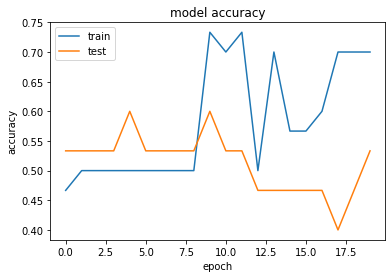

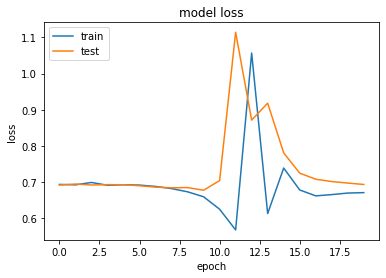

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()